In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:

# Load the dataset to examine its structure
file_path = 'cleaned_movie_data.csv'
movie_data = pd.read_csv(file_path)

# Display basic information about the dataset
movie_data_info = movie_data.info()
movie_data_head = movie_data.head()

print(movie_data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48049 entries, 0 to 48048
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 48049 non-null  int64 
 1   title              48049 non-null  object
 2   genres             48049 non-null  object
 3   plot_summary       48049 non-null  object
 4   high_Level_Genres  48048 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB
None


In [ ]:
print(movie_data_head)

         id             title            genres  \
0  23890098        Taxi Blues             Drama   
1  23890098        Taxi Blues      World cinema   
2  31186339  The Hunger Games  Action/Adventure   
3  31186339  The Hunger Games   Science Fiction   
4  31186339  The Hunger Games            Action   

                                        plot_summary high_Level_Genres  
0  shlykov a hardworking taxi driver and lyosha a...             Drama  
1  shlykov a hardworking taxi driver and lyosha a...     International  
2  the nation of panem consists of a wealthy capi...         Adventure  
3  the nation of panem consists of a wealthy capi...   Science Fiction  
4  the nation of panem consists of a wealthy capi...            Action  


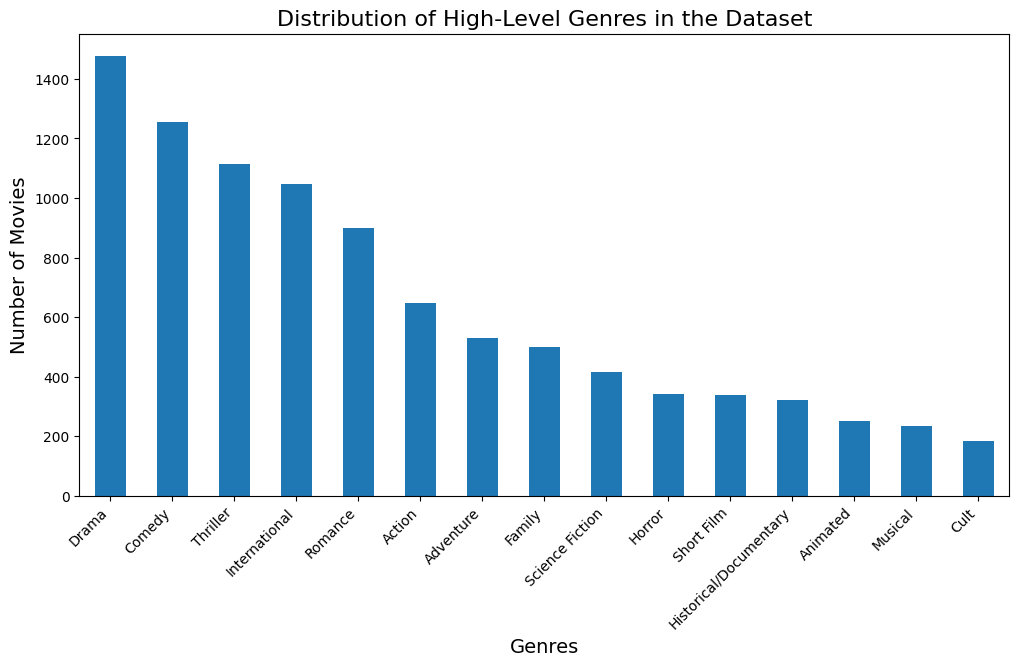

,count
high_Level_Genres,
Drama,1478
Comedy,1256
Thriller,1113
International,1048
Romance,899
Action,646
Adventure,528
Family,500
Science Fiction,417


In [ ]:
# Count the occurrences of each high-level genre
genre_distribution = movie_data['high_Level_Genres'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar')
plt.title('Distribution of High-Level Genres in the Dataset', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

genre_distribution

In [ ]:
import re

def clean_text(text):
    """
    Function to clean and preprocess text data.
    Steps:
    1. Lowercase the text.
    2. Remove special characters and numbers.
    3. Remove extra whitespace.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply the cleaning function to the 'plot_summary' column
movie_data['cleaned_plot_summary'] = movie_data['plot_summary'].apply(clean_text)

# Display the first few rows of the dataset after cleaning
movie_data[['title', 'plot_summary', 'cleaned_plot_summary']].head()


,title,plot_summary,cleaned_plot_summary
0,Taxi Blues,shlykov a hardworking taxi driver and lyosha a...,shlykov a hardworking taxi driver and lyosha a...
1,Taxi Blues,shlykov a hardworking taxi driver and lyosha a...,shlykov a hardworking taxi driver and lyosha a...
2,The Hunger Games,the nation of panem consists of a wealthy capi...,the nation of panem consists of a wealthy capi...
3,The Hunger Games,the nation of panem consists of a wealthy capi...,the nation of panem consists of a wealthy capi...
4,The Hunger Games,the nation of panem consists of a wealthy capi...,the nation of panem consists of a wealthy capi...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'high_Level_Genres' column
label_encoder = LabelEncoder()
movie_data['encoded_genres'] = label_encoder.fit_transform(movie_data['high_Level_Genres'])

# Display the mapping of genres to their encoded values
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

genre_mapping


{'Action': 0,
 'Adventure': 1,
 'Animated': 2,
 'Comedy': 3,
 'Cult': 4,
 'Drama': 5,
 'Family': 6,
 'Historical/Documentary': 7,
 'Horror': 8,
 'International': 9,
 'Musical': 10,
 'Romance': 11,
 'Science Fiction': 12,
 'Short Film': 13,
 'Thriller': 14,
 nan: 15}

Naive Bayes and Logistic Regression

In [ ]:
# Filter out rare classes
class_counts = movie_data['encoded_genres'].value_counts()
valid_classes = class_counts[class_counts > 1].index
filtered_data = movie_data[movie_data['encoded_genres'].isin(valid_classes)]


In [ ]:
# Re-encode genres for the filtered dataset
filtered_data = filtered_data.copy()  # Avoid SettingWithCopyWarning
filtered_data['encoded_genres'] = filtered_label_encoder.fit_transform(filtered_data['high_Level_Genres'])

# Proceed with train-test split
X = filtered_data['cleaned_plot_summary']
y = filtered_data['encoded_genres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and evaluate models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Convert text data to Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
y_pred_nb = nb_model.predict(X_test_bow)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=2000, solver='lbfgs')
lr_model.fit(X_train_bow, y_train)
y_pred_lr = lr_model.predict(X_test_bow)

# Use class names from the filtered_label_encoder
target_names = list(filtered_label_encoder.classes_)

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=target_names))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=target_names))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Naive Bayes Classification Report:
                        precision    recall  f1-score   support

                Action       0.18      0.19      0.18       129
             Adventure       0.09      0.09      0.09       106
              Animated       0.07      0.10      0.08        50
                Comedy       0.27      0.17      0.21       251
                  Cult       0.07      0.08      0.08        36
                 Drama       0.19      0.20      0.19       296
                Family       0.23      0.14      0.17       100
Historical/Documentary       0.22      0.42      0.29        64
                Horror       0.13      0.13      0.13        69
         International       0.12      0.08      0.10       210
               Musical       0.06      0.11      0.08        47
               Romance       0.28      0.40      0.33       180
       Science Fiction       0.13      0.16      0.14        83
            Short Film       0.11      0.12      0.11        68
    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Addressing the class Imbalance and switching to TF-IDF Vectorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Compute class weights to address imbalance
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y),
    y=y
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes Model (doesn't use class weights, but benefits from TF-IDF)
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=filtered_label_encoder.classes_))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Logistic Regression Model with Class Weights
lr_model = LogisticRegression(max_iter=2000, solver='lbfgs', class_weight=class_weights_dict)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=filtered_label_encoder.classes_))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Naive Bayes Classification Report:
                        precision    recall  f1-score   support

                Action       0.19      0.05      0.07       129
             Adventure       0.00      0.00      0.00       106
              Animated       0.00      0.00      0.00        50
                Comedy       0.21      0.35      0.26       251
                  Cult       0.00      0.00      0.00        36
                 Drama       0.19      0.67      0.30       296
                Family       0.00      0.00      0.00       100
Historical/Documentary       0.00      0.00      0.00        64
                Horror       0.00      0.00      0.00        69
         International       0.14      0.05      0.08       210
               Musical       0.00      0.00      0.00        47
               Romance       0.14      0.04      0.06       180
       Science Fiction       0.00      0.00      0.00        83
            Short Film       0.00      0.00      0.00        68
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Classification Report:
                        precision    recall  f1-score   support

                Action       0.20      0.25      0.22       129
             Adventure       0.08      0.11      0.10       106
              Animated       0.06      0.12      0.08        50
                Comedy       0.24      0.09      0.13       251
                  Cult       0.04      0.14      0.07        36
                 Drama       0.10      0.04      0.05       296
                Family       0.20      0.20      0.20       100
Historical/Documentary       0.21      0.45      0.28        64
                Horror       0.15      0.25      0.19        69
         International       0.14      0.05      0.08       210
               Musical       0.06      0.15      0.09        47
               Romance       0.27      0.39      0.32       180
       Science Fiction       0.13      0.16      0.14        83
            Short Film       0.09      0.10      0.09      

Neural Network Code with TF-IDF

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Binarize the target labels for multi-class classification
label_binarizer = LabelBinarizer()
y_train_binarized = label_binarizer.fit_transform(y_train)
y_test_binarized = label_binarizer.transform(y_test)

# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_tfidf.shape[1]),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(filtered_label_encoder.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_tfidf.toarray(),  # Convert sparse matrix to dense array
    y_train_binarized,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate on the test set
y_pred_probs = model.predict(X_test_tfidf.toarray())  # Predictions as probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Print classification report
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred, target_names=filtered_label_encoder.classes_))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Neural Network Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1292 - loss: 2.5821 - val_accuracy: 0.1916 - val_loss: 2.3941
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2224 - loss: 2.3137 - val_accuracy: 0.2315 - val_loss: 2.2431
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3050 - loss: 2.0607 - val_accuracy: 0.2341 - val_loss: 2.2069
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3813 - loss: 1.8514 - val_accuracy: 0.2315 - val_loss: 2.2351
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4319 - loss: 1.6653 - val_accuracy: 0.2067 - val_loss: 2.2945
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4450 - loss: 1.5791 - val_accuracy: 0.2001 - val_loss: 2.3910
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 1.5092 - val_accuracy: 0.1903 - val_loss: 2.4348
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4654 - loss: 1.4515 - val_accuracy: 0